# House Price Analysis with Linear Regression - EDA

---
___
***

The focus of this project will be centered around first time home buyers. 

## Data Cleaning
Data is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action= 'ignore', category= UserWarning)

#code to display all the columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

What are all these columns?
Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - date house was sold
* **price** - price is prediction target
* **bedrooms** - number of Bedrooms/House
* **bathrooms** - number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** -  square footage of the lot
* **floors** - total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has a view
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip code
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


### Datetime

The "date" column is currently an object. Let's change it to datetime, then extract the month and year so we can use those easily. Then, drop the original date column.

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['month_sold'] = df.date.dt.month
df['year_sold'] = df.date.dt.year
df.drop(['date'], axis= 1, inplace= True)

### Odd values 

In [7]:
df.sqft_basement.value_counts(normalize= True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
2810.0    0.000046
3000.0    0.000046
2196.0    0.000046
266.0     0.000046
415.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

0.2% of the data is marked as '?' while 59.3% is marked as '0.0'. 

In [8]:
# change ? in column to 0 - most commonly seen value
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

In [9]:
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
2810.0        1
3000.0        1
2196.0        1
266.0         1
768.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [10]:
# change data type of basement to float instead of object
df['sqft_basement'] = df.sqft_basement.astype('float64')

In [11]:
# see how many rows have a value for sqft_basement
len (df.loc[df['sqft_basement'] > 0])

8317

Let's look elsewhere and see if there is anything else odd.

In [12]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  17755.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     83.636778   
std        1.173200    827.759761     439.819830     29.375234    399.946414   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000   
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512   
std       53.513072      0.138552      0.140724     685.230472   27274.441950   
min    98001.000000     47.155900   -122.519000     399.000000     651.000000   
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000   
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000   
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000   
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000   

         month_sold     year_sold  
count  21597.000000  21597.000000  
mean       6.573969   2014.322962  
std        3.115061      0.467619  
min        1.000000   2014.000000  
25%        4.000000   2014.000000  
50%        6.000000   2014.000000  
75%        9.000000   2015.000000  
max       12.000000   2015.000000

That house with 33 bedrooms is definitely odd. Let's check it out.

In [13]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
# Let's look at any house that had 10+ bedrooms and see how the 
# house with 33 bedrooms compares
df[df['bedrooms'] >= 10]

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8748   1773100755   520000.0        11       3.00         3000      4960   
13301   627300145  1150000.0        10       5.25         4590     10920   
15147  5566100170   650000.0        10       2.00         3610     11914   
15856  2402100895   640000.0        33       1.75         1620      6000   
19239  8812401450   660000.0        10       3.00         2920      3745   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
8748      2.0         0.0   0.0          3      7        2400          600.0   
13301     1.0         0.0   2.0          3      9        2500         2090.0   
15147     2.0         0.0   0.0          4      7        3010          600.0   
15856     1.0         0.0   0.0          5      7        1040          580.0   
19239     2.0         0.0   0.0          4      7        1860         1060.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
8748       1918        1999.0    98106  47.5560 -122.363           1420   
13301      2008           0.0    98004  47.5861 -122.113           2730   
15147      1958           0.0    98006  47.5705 -122.175           2040   
15856      1947           0.0    98103  47.6878 -122.331           1330   
19239      1913           0.0    98105  47.6635 -122.320           1810   

       sqft_lot15  month_sold  year_sold  
8748         4960           8       2014  
13301       10400           8       2014  
15147       11914          10       2014  
15856        4700           6       2014  
19239        3745          12       2014

Some ways it doesn't differ too much from the other houses:
* best condition
* similar grade
* median in terms of lot size
* fairly similar number of bathrooms

But, in some ways, it is concerning:
* lowest amount of square footage
* only 1 story / floor
* only 1.75 bathrooms for 33 rooms?
* But, mainly, 33 rooms?!? 

It's too suspicious. Let's just remove it.

In [15]:
# Drop the 33 bedroom house then verify that it is gone
df.drop(index=15856, inplace= True)
# df[df['bedrooms'] >= 10]

### Null values

In [16]:
# look at values in waterfront
df.waterfront.value_counts(normalize= True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [17]:
# look at values in view
df.view.value_counts(normalize= True)

0.0    0.901918
2.0    0.044443
3.0    0.023592
1.0    0.015325
4.0    0.014722
Name: view, dtype: float64

In [18]:
# look at values in yr_renovated column
df.yr_renovated.value_counts(normalize= True)

0.0       0.958094
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

99.2% of homes are not considered waterfront properties.

90% of homes do not have a view. While there are more categories, and replacing the null values with 0 may still be iffy, there are not very many missing values.

95.8% of homes have never been renovated. 

We can feel secure in replacing those all the missing values with zeros.

In [19]:
df.fillna(0, inplace= True)

### Duplicates

Most columns will likely have duplicates - especially the categorical columns. But the 'id' should have only one id per entry. Let's check that out.

In [20]:
# check id column for duplicate entries
df.id.duplicated().sum()

177

In [21]:
df_id_dups = df[df.duplicated('id')]

In [22]:
df_id_dups.reset_index(drop= True, inplace= True)

In [23]:
df.loc[df['id'] == 6021501535]

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
93  6021501535  430000.0         3        1.5         1580      5000     1.0   
94  6021501535  700000.0         3        1.5         1580      5000     1.0   

    waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
93         0.0   0.0          3      8        1290          290.0      1939   
94         0.0   0.0          3      8        1290          290.0      1939   

    yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  \
93           0.0    98117  47.687 -122.386           1570        4500   
94           0.0    98117  47.687 -122.386           1570        4500   

    month_sold  year_sold  
93           7       2014  
94          12       2014

In [24]:
df.loc[df['id'] == 4139480200]

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
313  4139480200  1380000.0         4       3.25         4290     12103   
314  4139480200  1400000.0         4       3.25         4290     12103   

     floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
313     1.0         0.0   3.0          3     11        2690         1600.0   
314     1.0         0.0   3.0          3     11        2690         1600.0   

     yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
313      1997           0.0    98006  47.5503 -122.102           3860   
314      1997           0.0    98006  47.5503 -122.102           3860   

     sqft_lot15  month_sold  year_sold  
313       11244           6       2014  
314       11244          12       2014

In [25]:
df.loc[df['id'] == 3969300030]

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
345  3969300030  165000.0         4        1.0         1000      7134     1.0   
346  3969300030  239900.0         4        1.0         1000      7134     1.0   

     waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
345         0.0   0.0          3      6        1000            0.0      1943   
346         0.0   0.0          3      6        1000            0.0      1943   

     yr_renovated  zipcode      lat    long  sqft_living15  sqft_lot15  \
345           0.0    98178  47.4897 -122.24           1020        7138   
346           0.0    98178  47.4897 -122.24           1020        7138   

     month_sold  year_sold  
345           7       2014  
346          12       2014

It looks like the rows that have identical id numbers were sold a few months apart. I'm going to drop the older data. (AKA the first entries)

In [26]:
df.drop_duplicates(subset= 'id', keep= 'last', inplace= True)

In [27]:
df.id.duplicated().sum()

0

In [28]:
df.reset_index(inplace= True, drop= True)

Great! We took care of duplicates, null values, odd values, and have correct data types.

We can move on to taking a closer look at the data.

## Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Data visualization is the graphical representation of data in order to interactively and efficiently convey insights to others.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21419 non-null  int64  
 1   price          21419 non-null  float64
 2   bedrooms       21419 non-null  int64  
 3   bathrooms      21419 non-null  float64
 4   sqft_living    21419 non-null  int64  
 5   sqft_lot       21419 non-null  int64  
 6   floors         21419 non-null  float64
 7   waterfront     21419 non-null  float64
 8   view           21419 non-null  float64
 9   condition      21419 non-null  int64  
 10  grade          21419 non-null  int64  
 11  sqft_above     21419 non-null  int64  
 12  sqft_basement  21419 non-null  float64
 13  yr_built       21419 non-null  int64  
 14  yr_renovated   21419 non-null  float64
 15  zipcode        21419 non-null  int64  
 16  lat            21419 non-null  float64
 17  long           21419 non-null  float64
 18  sqft_l

### Questions?

Given the information we have and that we are looking at data that would be interesting to first time home buyers, let's generate some questions that might conclude some interesting answers.

1. Which season is best to buy a house if you want the lowest price?
2. Does a waterfront or view matter? Could a first time home buyer afford that?
3. Are there some grades or conditions that might be out of reach for a first time home buyer?
4. Is there an area that we can focus on or eliminate?

#### Criteria assumptions
Before we dive into those questions, it would be helpful to get rid of the information that is not pertinent to a first time home buyer. These could be things like:
* houses over a certain price
* houses with a large square footage
* houses with a lot of bedrooms

So, let's work on removing the irrelevant data.

<AxesSubplot:xlabel='price'>

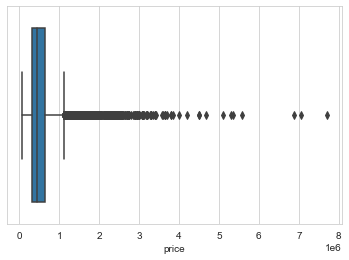

In [30]:
#  Visualize price and outliers
#  Assume for first time home buyer - budget is not more than $900,000
sns.boxplot(x= df['price'])

In [31]:
# remove houses that sold for > $900,000
df = df[df['price'] <= 850000]

<AxesSubplot:xlabel='sqft_living'>

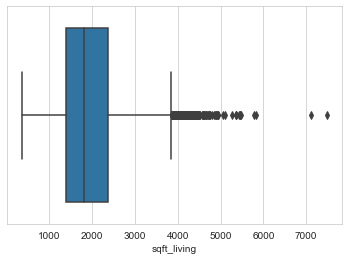

In [32]:
# Visualize houses with high square footage
sns.boxplot(x= df['sqft_living'])

In [33]:
# Whoa! Those are some large houses! Let's cut out the outliers
df = df[df['sqft_living'] <= 4500]

<AxesSubplot:xlabel='bedrooms'>

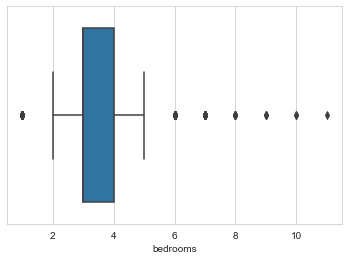

In [34]:
# Visualize bedrooms after houses with large price tags were removed
sns.boxplot(x= df['bedrooms'])

In [35]:
# remove houses with more than 6 bedrooms
df = df[df['bedrooms'] <= 6]

<AxesSubplot:xlabel='sqft_lot'>

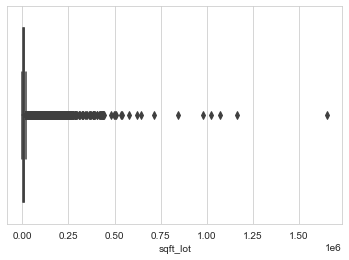

In [36]:
#check lot sizes
sns.boxplot(x= df['sqft_lot'])

In [37]:
df.loc[df['sqft_lot'] > 750000]

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1702   1020069017  700000.0         4       1.00         1300   1651359   
4401   3626079040  790000.0         2       3.00         2560    982278   
4500   2522029039  550000.0         3       2.00         3650    843309   
7582   2623069031  542500.0         5       3.25         3010   1074218   
7704   2323089009  855000.0         4       3.50         4030   1024068   
17149  3326079016  190000.0         2       1.00          710   1164794   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
1702      1.0         0.0   3.0          4      6        1300            0.0   
4401      1.0         0.0   0.0          3      8        2560            0.0   
4500      2.0         0.0   0.0          4      7        3650            0.0   
7582      1.5         0.0   0.0          5      8        2010         1000.0   
7704      2.0         0.0   0.0          3     10        4030            0.0   
17149     1.0         0.0   0.0          2      5         710            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1702       1920           0.0    98022  47.2313 -122.023           2560   
4401       2004           0.0    98014  47.6955 -121.861           1620   
4500       1991           0.0    98070  47.3627 -122.496           1870   
7582       1931           0.0    98027  47.4564 -122.004           2450   
7704       2006           0.0    98045  47.4619 -121.744           1830   
17149      1915           0.0    98014  47.6888 -121.909           1680   

       sqft_lot15  month_sold  year_sold  
1702       425581           3       2015  
4401        40946           7       2014  
4500       273992           9       2014  
7582        68825           5       2014  
7704        11700           1       2015  
17149       16730           5       2015

Only 5 lots have more than 750,000 square feet (which equals about 17.2 acres). That is still plenty of land for those first time home buyers. Let's remove those 5 houses with very large lots.

<AxesSubplot:xlabel='sqft_lot'>

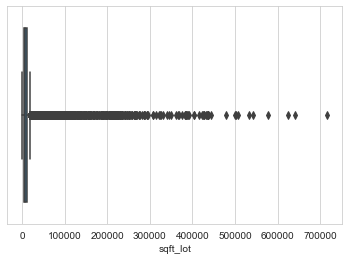

In [38]:
df = df[df['sqft_lot'] < 750000]
sns.boxplot(x= df['sqft_lot'])

#### 1. Which season is best to buy a house if you want the lowest price?

To answer this question, we will have to break the months up into seasons. Then we will find which season has the lowest average sale price.

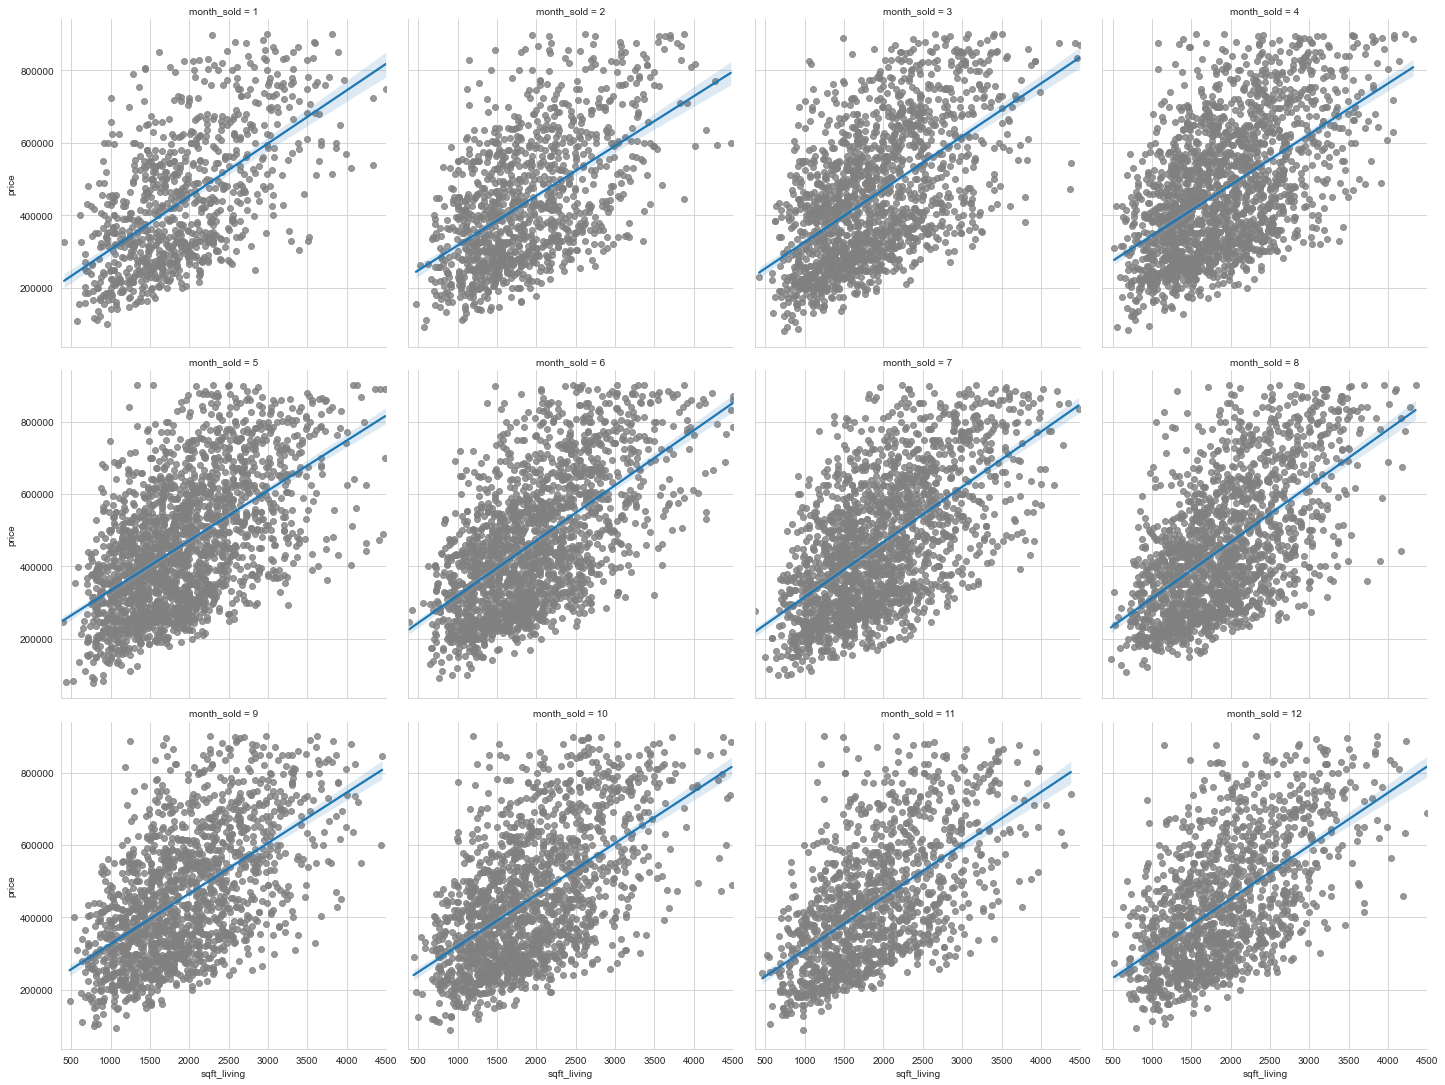

In [39]:
# First, let's look at the months and see if there appears to be a trend
g1 = sns.lmplot(x= 'sqft_living', y= 'price', data= df, col= 'month_sold', 
               col_wrap= 4, scatter_kws = {'color': 'gray'})

In [40]:
# set columns for months sold
df.loc[(df['month_sold'] >= 4) & (df['month_sold'] <= 6), 'season'] = 'spring'
df.loc[(df['month_sold'] >= 7) & (df['month_sold'] <= 9), 'season'] = 'summer'
df.loc[(df['month_sold'] == 10) | (df['month_sold'] == 11), 'season'] = 'fall'
df.loc[(df['month_sold'] == 12), 'season'] = 'winter1'
df.loc[(df['month_sold'] <= 3), 'season'] = 'winter2'

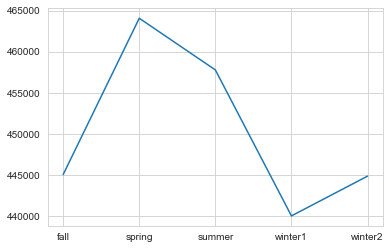

In [41]:
plt.plot(df.groupby('season')['price'].mean().round(2))

<AxesSubplot:xlabel='season', ylabel='price'>

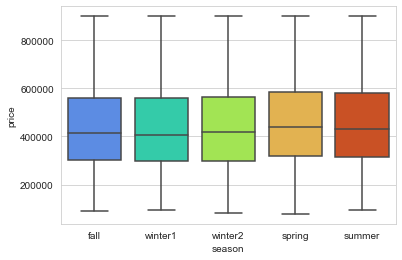

In [42]:
sns.boxplot(x= 'season', y= 'price', data= df, palette= 'turbo')

In [43]:
df_s = df.groupby('season')['price'].mean().round(2)
df_s

season
fall       445087.13
spring     464075.30
summer     457796.21
winter1    440060.86
winter2    444894.48
Name: price, dtype: float64

The most expensive season to buy a house is in spring - April through June - with the average sale price with our criteria being $443,511.71

The least expensive season to buy a house is in "winter2" or the months January through March.
The average home with our search criteria sold for $424,830.72

When comparing the line graph to the boxplot, you can now see that the amount you would be saving is difficult to see in some seasons. The savings would be about $18,000-19,000 between the least expensive time of year (January - March) and the most expensive (April - June). 

However, it is interesting to see that fall, winter1, and winter2 don't vary that much from each other. During October through March, one might expect to pay only 2K-3K more or less.

#### 2. Does a waterfront or view matter? Could a first time home buyer afford that?

Let's see how many waterfront properties or houses with views we have. When we took out higher priced homes, it may not have left much data in those features.

In [44]:
print(len(df[df['waterfront'] == 1]))
len(df[df['view'] > 0])

40


1309

In [45]:
len(df[df['waterfront'] == 1]) / len(df)

0.002072002072002072

There were only 35 properties that were sold in the first time home buyer's criteria. If they really want a waterfront property, they may have to wait a while.

In [46]:
len(df[df['view'] > 0]) / len(df)

0.0678062678062678

While 6% of the data is still a small portion, we can leave it and see what the analysis says.

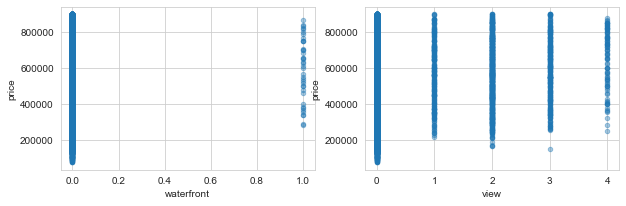

In [47]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (10, 3))

for xcol, ax in zip([ 'waterfront', 'view'], axes):
    df.plot(kind= 'scatter', x=xcol, y= 'price', ax=ax, alpha= 0.4)

Looks like getting a house with a view could still be a possibility. It appears that there are some houses priced around $200,000 that have a view rated "2"

#### 3. Are there some grades or conditions that might be out of reach for a first time home buyer?

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

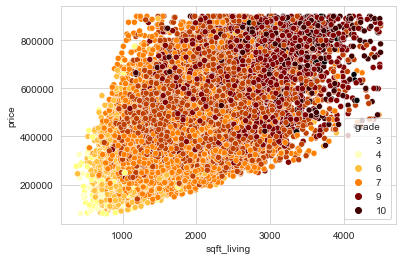

In [48]:
sns.scatterplot(x= 'sqft_living', y= 'price', hue= 'grade', data= df, 
                palette= 'afmhot_r')

Grades do seem to improve with price, but there are some smaller and less expensive homes that have higher grades.

0.0013986013986013986

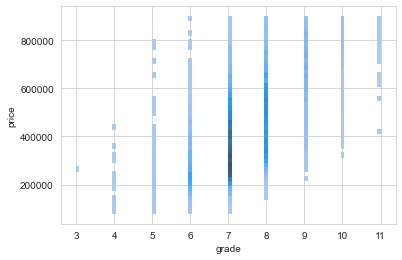

In [49]:
# #Looking at grades of the houses
sns.histplot(x= 'grade', y= 'price', data= df)

# percent of houses sold with a grade "4"
len(df[df['grade'] == 4]) / len(df)

0.00947940947940948

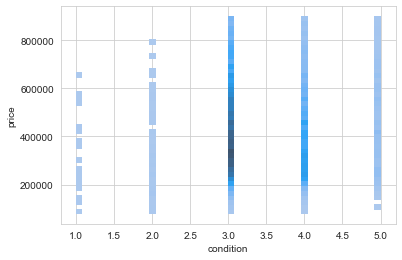

In [50]:
sns.histplot(x= 'condition', y= 'price', data= df)
# percent of houses with a condition of "1 or "2" 
len(df[df['condition'] <= 2]) / len(df)

In [51]:
df.condition.unique()

array([3, 5, 4, 1, 2])

While we may not want a first time home buyer to buy a house in poor condition, there are not many houses that would qualify. Since condition and grade can be subjective, we can leave them in and let the potential new home owner decide.

### Feature Selection

#### 4. Is there an area that we can focus on or eliminate?

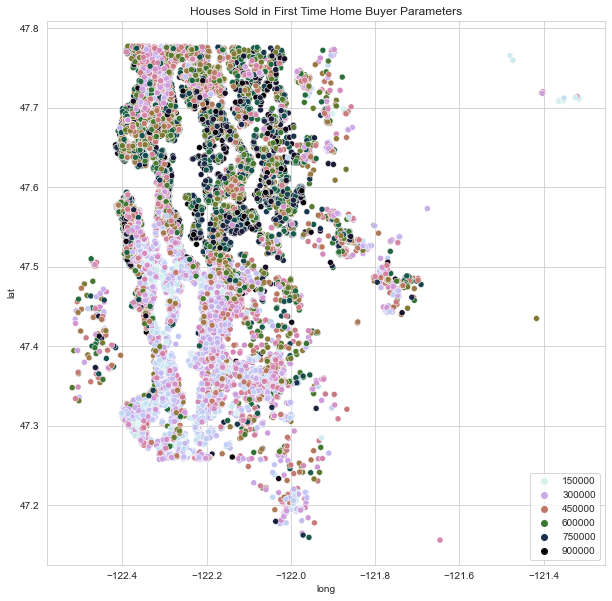

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette= 'cubehelix_r')
plt.title('Houses Sold in First Time Home Buyer Parameters')
plt.legend(loc= 'lower right');

Appears that the houses that sold for more are on the Northern side. We can separate the areas to see if we are correct.

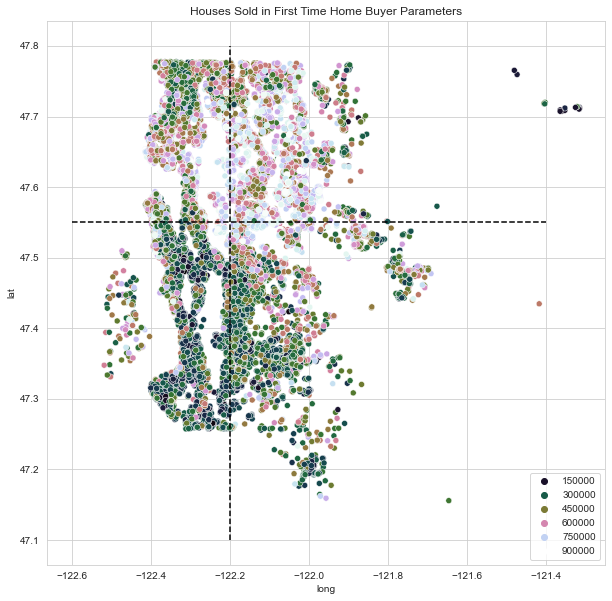

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette= 'cubehelix')
plt.hlines(y=47.55, xmin=-122.6, xmax=-121.4, colors='black', linestyle='--')
plt.vlines(x=-122.2, ymin=47.1, ymax=47.8, colors='black', linestyle='--')
plt.title('Houses Sold in First Time Home Buyer Parameters')
plt.legend(loc= 'lower right');

That appears to separate the areas fairly evenly. Let's turn the latitude and longitude into quadrants and use the quadrants instead of zipcodes as locators.

In [54]:
df.loc[(df['lat'] >= 47.5) & (df['long'] >= -122.2), 'quadrant' ] = 'NW'
df.loc[(df['lat'] > 47.5) & (df['long'] < -122.2), 'quadrant' ] = 'NE'
df.loc[(df['lat'] <= 47.5) & (df['long'] <= -122.2), 'quadrant' ] = 'SW'
df.loc[(df['lat'] < 47.5) & (df['long'] > -122.2), 'quadrant' ] = 'SE'

In [55]:
# did it work?
# df_q3 = df[df['quadrant'] == 3]
# sns.scatterplot(x='long', y='lat', hue='price', data=df_q3, 
#                 palette= 'cubehelix')

The theory is that houses in quadrants 3 and 4 will be more affordable than those in quadrants 1 and 2.

<AxesSubplot:xlabel='quadrant', ylabel='price'>

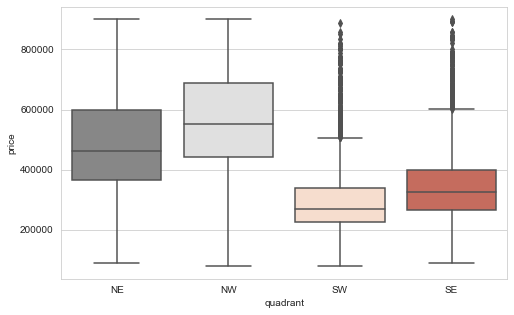

In [56]:
plt.figure(figsize= (8,5))
sns.boxplot(x= 'quadrant', y= 'price', data= df, palette= 'RdGy_r')

Looks like we were right. If we are only looking at homes that are less than $800,000, then houses in the Southern quadrants would, generally, be the least expensive.

In [57]:
df.reset_index(drop= True, inplace= True)

In [58]:
# Save a copy of cleaned and organized data before one-hot encoding or 
# dropping columns

df.to_csv('data/clean_df.csv')

## Feature Engineering

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

### Separate Continuous and Categorical Data

In [59]:
# use this to see which columns could be categorical or continuous data
continuous = []
categorical = []

for col in df.columns:
    if (df[col].nunique() < 15):
        categorical.append(col)
    else:
        continuous.append(col)

In [60]:
continuous

['id',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [61]:
categorical

['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'month_sold',
 'year_sold',
 'season',
 'quadrant']

Almost perfect. But I think there are some columns labeled categorical that I would consider continuous.

In [62]:
# Continuous data
con = ['id', 'price', 'sqft_living', 'sqft_lot','sqft_basement', 'yr_built', 
       'zipcode','lat','long']

In [63]:
# Categorical data
cat = ['waterfront','view','condition','grade', 'month_sold', 'year_sold', 
       'season','quadrant', 'bedrooms','bathrooms','floors', 'yr_renovated']

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>]], dtype=object)

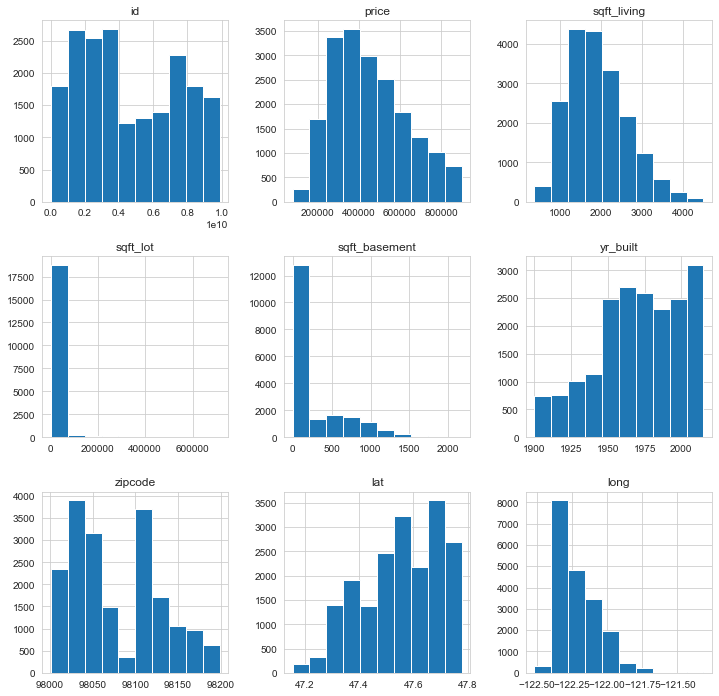

In [64]:
# Look at continuous variables
df_continuous = df.loc[:, con]
df_continuous.hist(figsize= (12, 12))

With the exception of "sqft_lot", these indeed look like they are continuous.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19305 entries, 0 to 19304
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19305 non-null  int64  
 1   price          19305 non-null  float64
 2   bedrooms       19305 non-null  int64  
 3   bathrooms      19305 non-null  float64
 4   sqft_living    19305 non-null  int64  
 5   sqft_lot       19305 non-null  int64  
 6   floors         19305 non-null  float64
 7   waterfront     19305 non-null  float64
 8   view           19305 non-null  float64
 9   condition      19305 non-null  int64  
 10  grade          19305 non-null  int64  
 11  sqft_above     19305 non-null  int64  
 12  sqft_basement  19305 non-null  float64
 13  yr_built       19305 non-null  int64  
 14  yr_renovated   19305 non-null  float64
 15  zipcode        19305 non-null  int64  
 16  lat            19305 non-null  float64
 17  long           19305 non-null  float64
 18  sqft_l

array([[<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'month_sold'}>,
        <AxesSubplot:title={'center':'year_sold'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

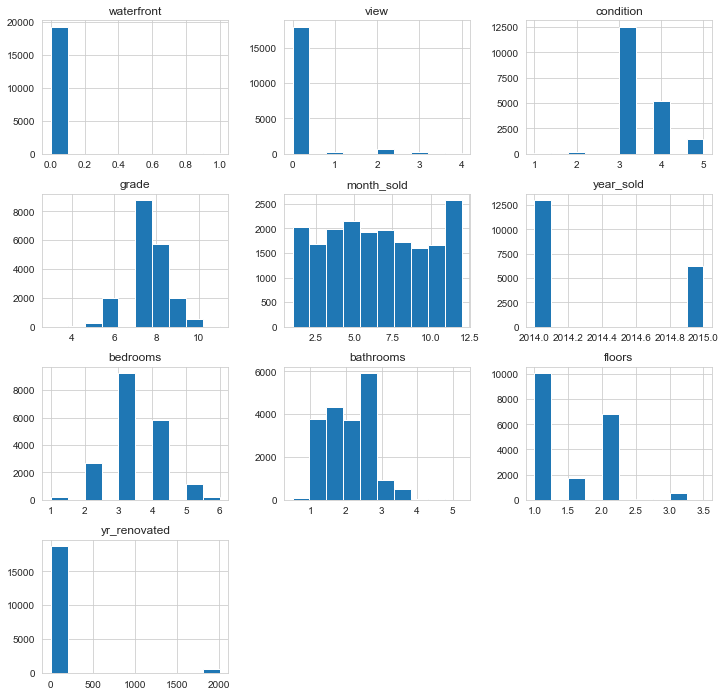

In [66]:
df_categorical = df.loc[:, cat]
df_categorical.hist(figsize= (12, 12))

Some of them could be cleaned up. But let's see what our baseline is and adjust from there.

### Baseline checks

#### Multicollinearity 

Check for interactions between other features.

In [67]:
corr = df.corr()
corr

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.025170  0.013845   0.033010     0.017764 -0.149953   
price          0.025170  1.000000  0.277001   0.411773     0.574037  0.092929   
bedrooms       0.013845  0.277001  1.000000   0.491552     0.608166  0.023107   
bathrooms      0.033010  0.411773  0.491552   1.000000     0.698891  0.055579   
sqft_living    0.017764  0.574037  0.608166   0.698891     1.000000  0.162436   
sqft_lot      -0.149953  0.092929  0.023107   0.055579     0.162436  1.000000   
floors         0.034918  0.254552  0.150010   0.502937     0.328227 -0.028386   
waterfront    -0.004108  0.035919 -0.034370  -0.023131    -0.008139  0.017041   
view           0.016953  0.185941  0.018689   0.061526     0.129193  0.094295   
condition     -0.030190  0.030008  0.022544  -0.143593    -0.077623 -0.002378   
grade          0.043504  0.586947  0.318502   0.594468     0.673390  0.092139   
sqft_above     0.022738  0.479774  0.475801   0.616761     0.840729  0.166073   
sqft_basement -0.007016  0.209243  0.274326   0.198063     0.355379  0.007344   
yr_built       0.029417  0.052908  0.178104   0.566006     0.363229  0.045305   
yr_renovated  -0.012284  0.067483 -0.009698   0.008878     0.010037  0.016951   
zipcode       -0.007419 -0.006313 -0.163708  -0.218565    -0.214788 -0.142547   
lat            0.004789  0.458213 -0.052652  -0.031246    -0.018455 -0.109958   
long           0.020647  0.079765  0.155115   0.255004     0.296740  0.241132   
sqft_living15  0.018968  0.521648  0.386104   0.513336     0.727335  0.162845   
sqft_lot15    -0.146293  0.078463  0.018885   0.052825     0.162816  0.776361   
month_sold    -0.007378 -0.011655 -0.006201   0.010314     0.013250  0.006561   
year_sold      0.005256 -0.000634 -0.004015  -0.028653    -0.030327 -0.004734   

                 floors  waterfront      view  condition     grade  \
id             0.034918   -0.004108  0.016953  -0.030190  0.043504   
price          0.254552    0.035919  0.185941   0.030008  0.586947   
bedrooms       0.150010   -0.034370  0.018689   0.022544  0.318502   
bathrooms      0.502937   -0.023131  0.061526  -0.143593  0.594468   
sqft_living    0.328227   -0.008139  0.129193  -0.077623  0.673390   
sqft_lot      -0.028386    0.017041  0.094295  -0.002378  0.092139   
floors         1.000000   -0.014978 -0.022456  -0.283278  0.453071   
waterfront    -0.014978    1.000000  0.273691   0.010237 -0.019296   
view          -0.022456    0.273691  1.000000   0.026938  0.096717   
condition     -0.283278    0.010237  0.026938   1.000000 -0.183245   
grade          0.453071   -0.019296  0.096717  -0.183245  1.000000   
sqft_above     0.526853   -0.019541  0.039981  -0.186270  0.679703   
sqft_basement -0.309580    0.019686  0.161827   0.175218  0.046337   
yr_built       0.521639   -0.038070 -0.070536  -0.352563  0.508188   
yr_renovated  -0.010906    0.046613  0.043237  -0.051698 -0.024362   
zipcode       -0.068035    0.038712  0.101743  -0.004710 -0.187511   
lat            0.026386   -0.040575 -0.039114  -0.019313  0.064717   
long           0.136412   -0.054040 -0.075123  -0.096081  0.231118   
sqft_living15  0.259436    0.003343  0.152420  -0.129904  0.644364   
sqft_lot15    -0.030766    0.034491  0.084729   0.003137  0.091623   
month_sold     0.013176    0.007029 -0.000308   0.026278  0.017097   
year_sold     -0.022610   -0.007324  0.002618  -0.048777 -0.038009   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id               0.022738      -0.007016  0.029417     -0.012284 -0.007419   
price            0.479774       0.209243  0.052908      0.067483 -0.006313   
bedrooms         0.475801       0.274326  0.178104     -0.009698 -0.163708   
bathrooms        0.616761       0.198063  0.566006      0.008878 -0.218565   
sqft_living      0.840729       0.355379  0.363229      0.010037 -0.214788   
sqft_lot         0.166073       0.007344  0.045305      0.016951 -0.142547   


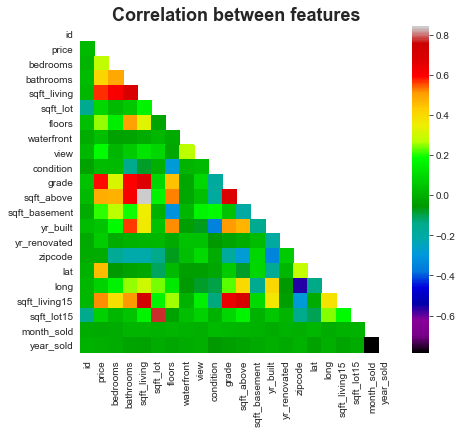

In [68]:
plt.figure(figsize=(7,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(), cmap= 'nipy_spectral', mask= mask)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

There are some areas of high correlation. The highest is where "sqft_above" meets "sqft_living". "sqft_living15" also correlates highly across other features. Those will be columns we look forward to removing.

In [69]:
df.drop(columns= ['sqft_above', 'sqft_living15','sqft_lot15', 'month_sold', 
                  'id'], inplace= True)
# df.info()

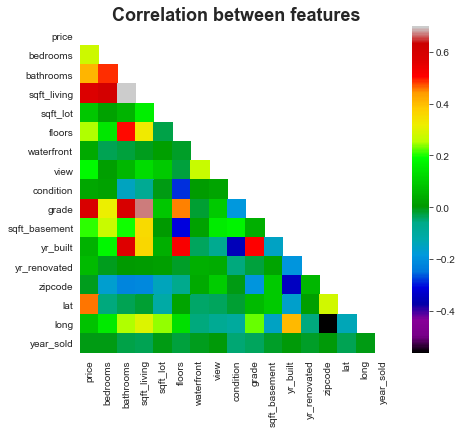

In [70]:
corr1 = df.corr()

plt.figure(figsize=(7,6))
mask = np.triu(np.ones_like(corr1, dtype=bool))
sns.heatmap(df.corr(), cmap= 'nipy_spectral', mask= mask)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

#### Baseline Model

In [71]:
df1 = df.copy()
outcome = 'price'
x_cols = df1.drop(['price'], axis= 1).columns
x_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'year_sold', 'season',
       'quadrant'],
      dtype='object')

In [72]:
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model = ols(formula = f, data= df1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     2004.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:32:01   Log-Likelihood:            -2.4918e+05
No. Observations:               19305   AIC:                         4.984e+05
Df Residuals:                   19281   BIC:                         4.986e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -5.51e+07   5.46e+06    -10.091      0.000   -6.58e+07   -4.44e+07
season[T.spring]   4782.4758   2451.467      1.951      0.051     -22.613    9587.564
season[T.summer]   5087.6149   2250.632      2.261      0.024     676.181    9499.049
season[T.winter1] -4614.9276   3241.378     -1.424      0.155    -1.1e+04    1738.456
season[T.winter2] -1.057e+04   3506.736     -3.014      0.003   -1.74e+04   -3696.133
quadrant[T.NW]     2.558e+04   3072.901      8.325      0.000    1.96e+04    3.16e+04
quadrant[T.SE]    -9.898e+04   3819.719    -25.912      0.000   -1.06e+05   -9.15e+04
quadrant[T.SW]    -1.371e+05   3323.390    -41.263      0.000   -1.44e+05   -1.31e+05
bedrooms          -8213.9906   1085.309     -7.568      0.000   -1.03e+04   -6086.691
bathrooms          1.973e+04   1771.466     11.136      0.000    1.63e+04    2.32e+04
sqft_living          95.7223      1.984     48.236      0.000      91.833      99.612
sqft_lot              0.3023      0.023     13.328      0.000       0.258       0.347
floors             1.429e+04   1925.564      7.422      0.000    1.05e+04    1.81e+04
waterfront          1.45e+05   1.62e+04      8.961      0.000    1.13e+05    1.77e+05
view               2.608e+04   1297.084     20.110      0.000    2.35e+04    2.86e+04
condition          2.216e+04   1220.479     18.153      0.000    1.98e+04    2.45e+04
grade              6.455e+04   1140.910     56.580      0.000    6.23e+04    6.68e+04
sqft_basement       -18.9672      2.454     -7.730      0.000     -23.777     -14.158
yr_built          -1385.3453     39.451    -35.116      0.000   -1462.672   -1308.019
yr_renovated         10.8823      2.208      4.929      0.000       6.555      15.210
zipcode            -114.0570     17.595     -6.482      0.000    -148.546     -79.568
lat                1.839e+05   9227.680     19.931      0.000    1.66e+05    2.02e+05
long              -8.457e+04   9226.566     -9.166      0.000   -1.03e+05   -6.65e+04
year_sold          2.465e+04   2545.814      9.681      0.000    1.97e+04    2.96e+04
==============================================================================
Omnibus:                      957.691   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1560.971
Skew:                           0.421   Prob(JB):                         0.00
Kurtosis:                       4.110   Cond. No.                     7.71e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Baseline $R^{2}$ = 0.646

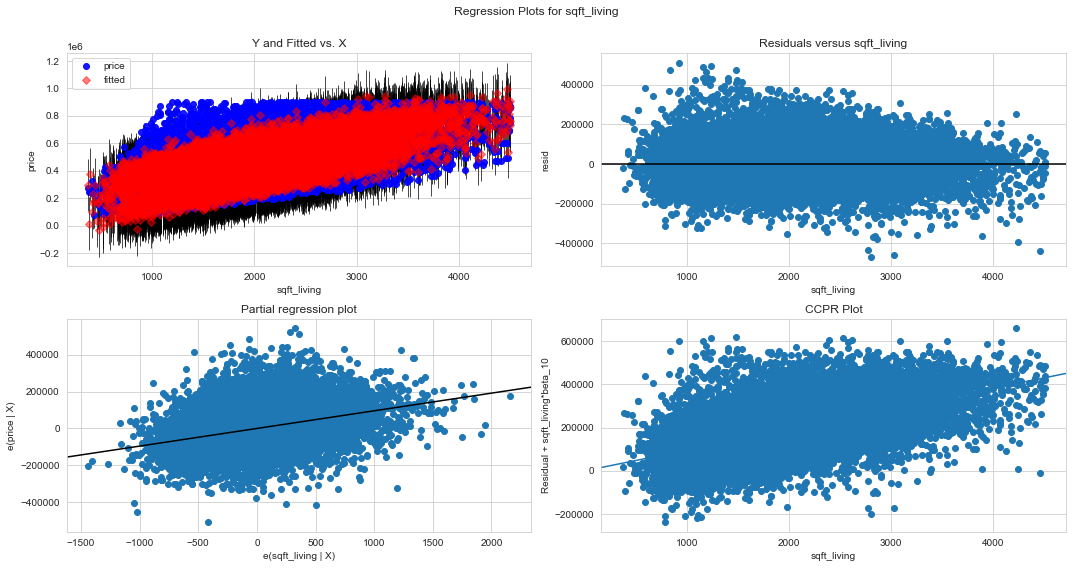

In [73]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.show()

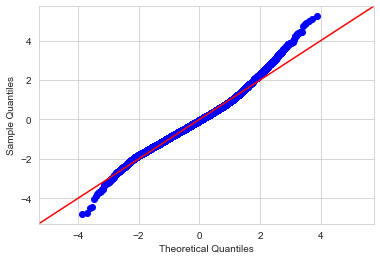

In [74]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### One-hot encoding and binning

Time to work with the data within some of these features to clean it up.
Features we'll focus on are:
* bathrooms
* floors
* grades
* sqft_basement
* view
* yr_renovated

#### Bathrooms and Floors

In [75]:
# make changes to df copy and see if model does better
df1 = df.copy()

In [76]:
# look at bathroom data
df1.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 1.5 , 2.5 , 1.75, 2.75, 4.  , 3.25, 3.5 ,
       0.75, 4.25, 1.25, 3.75, 4.5 , 4.75, 0.5 , 5.  , 5.25])

In [77]:
# Only count whole bathrooms
df1['bathrooms'] = df1.bathrooms.astype(int)
df1.bathrooms.unique()

array([1, 2, 3, 4, 0, 5])

In [78]:
# A house shouldn't have 0 bathrooms. Let's change the zeros to ones.
df1['bathrooms'] = df1['bathrooms'].map(lambda x: 1 if x == 0 else x)

In [79]:
# check out the values of floors
df1.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [80]:
# Change floors that end in .5 to even number
df1['floors'] = df1['floors'].map(lambda x: x + 0.5)
df1['floors'] = df1.floors.astype(int)
df1.floors.unique()

array([1, 2, 3, 4])

In [81]:
outcome = 'price'
x_cols = df1.drop(['price'], axis= 1).columns

predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model = ols(formula= f, data= df1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1998.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:32:03   Log-Likelihood:            -2.4920e+05
No. Observations:               19305   AIC:                         4.985e+05
Df Residuals:                   19281   BIC:                         4.986e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.507e+07   5.47e+06    -10.074      0.000   -6.58e+07   -4.44e+07
season[T.spring]   4767.9196   2454.139      1.943      0.052     -42.406    9578.245
season[T.summer]   5108.5267   2253.063      2.267      0.023     692.328    9524.726
season[T.winter1] -4704.2605   3244.906     -1.450      0.147   -1.11e+04    1656.038
season[T.winter2] -1.069e+04   3510.745     -3.046      0.002   -1.76e+04   -3813.276
quadrant[T.NW]     2.628e+04   3080.624      8.531      0.000    2.02e+04    3.23e+04
quadrant[T.SE]    -9.811e+04   3828.247    -25.629      0.000   -1.06e+05   -9.06e+04
quadrant[T.SW]    -1.368e+05   3326.195    -41.130      0.000   -1.43e+05    -1.3e+05
bedrooms          -7530.4087   1078.106     -6.985      0.000   -9643.590   -5417.227
bathrooms          1.271e+04   1582.838      8.030      0.000    9607.698    1.58e+04
sqft_living          98.2659      1.952     50.346      0.000      94.440     102.092
sqft_lot              0.2953      0.023     13.021      0.000       0.251       0.340
floors             1.587e+04   1669.830      9.506      0.000    1.26e+04    1.91e+04
waterfront         1.441e+05   1.62e+04      8.900      0.000    1.12e+05    1.76e+05
view               2.637e+04   1298.298     20.311      0.000    2.38e+04    2.89e+04
condition           2.28e+04   1218.735     18.710      0.000    2.04e+04    2.52e+04
grade              6.521e+04   1139.972     57.201      0.000     6.3e+04    6.74e+04
sqft_basement       -15.4250      2.419     -6.376      0.000     -20.167     -10.683
yr_built          -1267.1302     36.884    -34.354      0.000   -1339.426   -1194.834
yr_renovated         12.4116      2.203      5.634      0.000       8.094      16.729
zipcode            -119.4034     17.606     -6.782      0.000    -153.914     -84.893
lat                1.852e+05   9242.270     20.043      0.000    1.67e+05    2.03e+05
long              -8.647e+04   9234.292     -9.364      0.000   -1.05e+05   -6.84e+04
year_sold          2.463e+04   2548.640      9.663      0.000    1.96e+04    2.96e+04
==============================================================================
Omnibus:                      933.963   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1515.713
Skew:                           0.414   Prob(JB):                         0.00
Kurtosis:                       4.095   Cond. No.                     7.71e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^{2}$ on this model = 0.645

That is only .001 lower than our original and we haven't dropped anything yet.

But let's see if need to clean up other features, like grade or condition.

#### Grade Binning

In [82]:
print ('waterfront: ', df1.waterfront.unique())
print ('condition: ', df.condition.unique())

waterfront:  [0. 1.]
condition:  [3 5 4 1 2]


In [83]:
print ('grade values: ', df1['grade'].unique())

grade values:  [ 7  6  8  9  5 10  4 11  3]


7_8     14507
9_11     2552
5_6      2218
3_4        28
Name: grade, dtype: int64
Sum:  19305


<AxesSubplot:xlabel='grade', ylabel='count'>

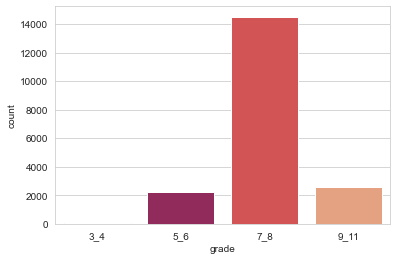

In [84]:
# Let's change waterfront to integers and bin some grades
df1['waterfront'] = df1.waterfront.astype(int)

grade_binned = pd.cut(df['grade'], bins= 4, right= False, 
                      labels = ['3_4', '5_6', '7_8','9_11'])
print(grade_binned.value_counts())
print ('Sum: ', grade_binned.value_counts().sum())
sns.countplot(x= grade_binned, palette= 'rocket')

In [85]:
df2 = df1.copy()

In [86]:
df2.drop(columns= ['grade'], axis= 1, inplace= True)

In [87]:
df2 = pd.concat([df2, grade_binned], names= ['grade_bin'], axis= 1)

In [88]:
df2.rename(columns={'grade': 'grade_binned'}, inplace= True)

In [89]:
grade_dummies = pd.get_dummies(df2['grade_binned'], prefix= 'grade', 
                               drop_first= True)

In [90]:
df2.drop(['grade_binned'], axis= 1, inplace= True)

In [91]:
df2 = pd.concat([df2, grade_dummies], axis= 1)

In [92]:
df2.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3          1         1180      5650       1           0   
1  538000.0         3          2         2570      7242       2           0   
2  180000.0         2          1          770     10000       1           0   
3  604000.0         4          3         1960      5000       1           0   
4  510000.0         3          2         1680      8080       1           0   

   view  condition  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0   0.0          3            0.0      1955           0.0    98178  47.5112   
1   0.0          3          400.0      1951        1991.0    98125  47.7210   
2   0.0          3            0.0      1933           0.0    98028  47.7379   
3   0.0          5          910.0      1965           0.0    98136  47.5208   
4   0.0          3            0.0      1987           0.0    98074  47.6168   

      long  year_sold   season quadrant  grade_5_6  grade_7_8  grade_9_11  
0 -122.257       2014     fall       NE          0          1           0  
1 -122.319       2014  winter1       NE          0          1           0  
2 -122.233       2015  winter2       NE          1          0           0  
3 -122.393       2014  winter1       NE          0          1           0  
4 -122.045       2015  winter2       NW          0          1           0

<AxesSubplot:>

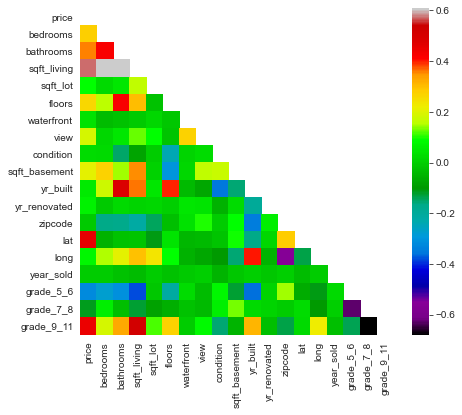

In [93]:
corr2 = df2.corr()

plt.figure(figsize=(7,6))
mask = np.triu(np.ones_like(corr2, dtype=bool))
sns.heatmap(df2.corr(), cmap= 'nipy_spectral', mask= mask)

In [94]:
outcome = 'price'
x_cols = df2.drop(['price'], axis= 1).columns

predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model = ols(formula= f, data= df2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1677.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:32:04   Log-Likelihood:            -2.4982e+05
No. Observations:               19305   AIC:                         4.997e+05
Df Residuals:                   19279   BIC:                         4.999e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.859e+07   5.64e+06    -10.380      0.000   -6.97e+07   -4.75e+07
season[T.spring]   5447.3414   2533.856      2.150      0.032     480.764    1.04e+04
season[T.summer]   5905.8492   2326.307      2.539      0.011    1346.085    1.05e+04
season[T.winter1] -4473.5887   3350.450     -1.335      0.182    -1.1e+04    2093.586
season[T.winter2] -1.092e+04   3625.271     -3.013      0.003    -1.8e+04   -3816.482
quadrant[T.NW]     3.254e+04   3178.428     10.236      0.000    2.63e+04    3.88e+04
quadrant[T.SE]    -1.015e+05   3954.754    -25.659      0.000   -1.09e+05   -9.37e+04
quadrant[T.SW]    -1.432e+05   3429.724    -41.751      0.000    -1.5e+05   -1.36e+05
bedrooms          -1.136e+04   1121.434    -10.134      0.000   -1.36e+04   -9166.301
bathrooms           1.52e+04   1635.086      9.297      0.000     1.2e+04    1.84e+04
sqft_living         119.0509      1.947     61.134      0.000     115.234     122.868
sqft_lot              0.2950      0.023     12.592      0.000       0.249       0.341
floors              2.14e+04   1722.262     12.425      0.000     1.8e+04    2.48e+04
waterfront         1.308e+05   1.67e+04      7.824      0.000     9.8e+04    1.64e+05
view               2.933e+04   1337.917     21.924      0.000    2.67e+04     3.2e+04
condition          2.305e+04   1260.693     18.284      0.000    2.06e+04    2.55e+04
sqft_basement       -20.5877      2.533     -8.126      0.000     -25.554     -15.622
yr_built           -999.3391     37.857    -26.398      0.000   -1073.541    -925.137
yr_renovated         14.7153      2.277      6.462      0.000      10.251      19.179
zipcode            -124.9920     18.235     -6.854      0.000    -160.735     -89.249
lat                1.852e+05   9567.548     19.355      0.000    1.66e+05    2.04e+05
long              -1.202e+05   9504.208    -12.651      0.000   -1.39e+05   -1.02e+05
year_sold          2.452e+04   2631.866      9.316      0.000    1.94e+04    2.97e+04
grade_5_6          1.054e+04   1.93e+04      0.547      0.584   -2.72e+04    4.83e+04
grade_7_8            8.3e+04   1.93e+04      4.311      0.000    4.53e+04    1.21e+05
grade_9_11         1.808e+05   1.95e+04      9.265      0.000    1.43e+05    2.19e+05
==============================================================================
Omnibus:                      869.098   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.105
Skew:                           0.399   Prob(JB):                    1.12e-298
Kurtosis:                       4.033   Cond. No.                     7.71e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

r2 went down

#### Basement, views, and renovations

Let's turn sqft_basement, yr_renovated, and view into either has or doesn't have.

In [95]:
df3 = df2.copy()

In [96]:
print ('Num of basement values: ', df.sqft_basement.nunique())
df3['has_basement'] = df3['sqft_basement'].map(lambda x: 1 if x > 0 else 0)

Num of basement values:  246


In [97]:
print ('View values: ', df.view.unique())
df3['has_view'] = df3['view'].map(lambda x: 1 if x > 0 else 0)

View values:  [0. 3. 2. 4. 1.]


In [98]:
print ('Num of renovation values: ', df3.yr_renovated.nunique())
df3['had_renovation'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

Num of renovation values:  70


In [99]:
df3.drop(columns= ['yr_renovated', 'view', 'sqft_basement'], axis= 1, inplace= True)

In [100]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19305 entries, 0 to 19304
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19305 non-null  float64
 1   bedrooms        19305 non-null  int64  
 2   bathrooms       19305 non-null  int64  
 3   sqft_living     19305 non-null  int64  
 4   sqft_lot        19305 non-null  int64  
 5   floors          19305 non-null  int64  
 6   waterfront      19305 non-null  int64  
 7   condition       19305 non-null  int64  
 8   yr_built        19305 non-null  int64  
 9   zipcode         19305 non-null  int64  
 10  lat             19305 non-null  float64
 11  long            19305 non-null  float64
 12  year_sold       19305 non-null  int64  
 13  season          19305 non-null  object 
 14  quadrant        19305 non-null  object 
 15  grade_5_6       19305 non-null  uint8  
 16  grade_7_8       19305 non-null  uint8  
 17  grade_9_11      19305 non-null 

In [101]:
outcome = 'price'
x_cols = df3.drop(columns= ['price'], axis= 1)

predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model = ols(formula= f, data= df3).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1672.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:32:04   Log-Likelihood:            -2.4984e+05
No. Observations:               19305   AIC:                         4.997e+05
Df Residuals:                   19279   BIC:                         4.999e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.772e+07   5.65e+06    -10.212      0.000   -6.88e+07   -4.66e+07
season[T.spring]   5333.0050   2536.464      2.103      0.036     361.314    1.03e+04
season[T.summer]   6070.6658   2328.739      2.607      0.009    1506.135    1.06e+04
season[T.winter1] -4451.0843   3353.966     -1.327      0.184    -1.1e+04    2122.981
season[T.winter2] -1.111e+04   3629.090     -3.061      0.002   -1.82e+04   -3993.781
quadrant[T.NW]     3.551e+04   3178.773     11.172      0.000    2.93e+04    4.17e+04
quadrant[T.SE]    -9.635e+04   3963.632    -24.309      0.000   -1.04e+05   -8.86e+04
quadrant[T.SW]    -1.386e+05   3441.490    -40.265      0.000   -1.45e+05   -1.32e+05
bedrooms          -1.148e+04   1122.461    -10.230      0.000   -1.37e+04   -9283.097
bathrooms          1.379e+04   1639.831      8.407      0.000    1.06e+04     1.7e+04
sqft_living         111.4607      1.811     61.532      0.000     107.910     115.011
sqft_lot              0.3030      0.023     12.931      0.000       0.257       0.349
floors             2.845e+04   1658.215     17.155      0.000    2.52e+04    3.17e+04
waterfront         1.691e+05   1.63e+04     10.352      0.000    1.37e+05    2.01e+05
condition          2.203e+04   1257.963     17.516      0.000    1.96e+04    2.45e+04
yr_built           -989.3472     37.881    -26.117      0.000   -1063.597    -915.097
zipcode            -130.3731     18.265     -7.138      0.000    -166.175     -94.572
lat                1.889e+05   9585.267     19.709      0.000     1.7e+05    2.08e+05
long              -1.125e+05   9521.179    -11.812      0.000   -1.31e+05   -9.38e+04
year_sold          2.472e+04   2634.546      9.382      0.000    1.96e+04    2.99e+04
grade_5_6          1.641e+04   1.93e+04      0.851      0.395   -2.14e+04    5.42e+04
grade_7_8          8.807e+04   1.93e+04      4.570      0.000    5.03e+04    1.26e+05
grade_9_11         1.915e+05   1.95e+04      9.811      0.000    1.53e+05     2.3e+05
has_basement        901.6711   1818.359      0.496      0.620   -2662.472    4465.814
has_view           6.683e+04   3053.794     21.885      0.000    6.08e+04    7.28e+04
had_renovation     2.987e+04   4548.305      6.568      0.000     2.1e+04    3.88e+04
==============================================================================
Omnibus:                      896.027   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1431.255
Skew:                           0.405   Prob(JB):                    1.61e-311
Kurtosis:                       4.059   Cond. No.                     7.71e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

We went from $R^2$ = 0.645 to 0.647. Let's keep these changes.

#### Use Dummy Variables

In [102]:
# use this to see which columns could be categorical or continuous data
continuous = []
categorical = []

for col in df3.columns:
    if (df3[col].nunique() < 15):
        categorical.append(col)
    else:
        continuous.append(col)

In [103]:
continuous

['price', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode', 'lat', 'long']

In [104]:
categorical

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'condition',
 'year_sold',
 'season',
 'quadrant',
 'grade_5_6',
 'grade_7_8',
 'grade_9_11',
 'has_basement',
 'has_view',
 'had_renovation']

##### Bedrooms, Bathrooms and Floors

The categorical columns are indeed categorical. Let's use dummy variables and see what happens to our model.

In [105]:
df4 = df3.copy()

In [106]:
#OHE bedrooms, bathrooms, and floors
bed_dum = pd.get_dummies(df4['bedrooms'], prefix= 'bed', drop_first= True)

In [107]:
# Fix seasons and quadrants
season_dum = pd.get_dummies(df4['season'], prefix= 'season', drop_first= True)
quad_dum = pd.get_dummies(df4['quadrant'], prefix= 'quad', drop_first= True)

In [108]:
df4 = df4.drop(['bedrooms', 'season', 'quadrant', 'zipcode', 'lat', 'long'],
               axis= 1)

In [109]:
df4 = pd.concat([df4, bed_dum, season_dum, quad_dum], axis= 1)

In [110]:
df4.head()

price  bathrooms  sqft_living  sqft_lot  floors  waterfront  condition  \
0  221900.0          1         1180      5650       1           0          3   
1  538000.0          2         2570      7242       2           0          3   
2  180000.0          1          770     10000       1           0          3   
3  604000.0          3         1960      5000       1           0          5   
4  510000.0          2         1680      8080       1           0          3   

   yr_built  year_sold  grade_5_6  grade_7_8  grade_9_11  has_basement  \
0      1955       2014          0          1           0             0   
1      1951       2014          0          1           0             1   
2      1933       2015          1          0           0             0   
3      1965       2014          0          1           0             1   
4      1987       2015          0          1           0             0   

   has_view  had_renovation  bed_2  bed_3  bed_4  bed_5  bed_6  season_spring  \
0         0               0      0      1      0      0      0              0   
1         0               1      0      1      0      0      0              0   
2         0               0      1      0      0      0      0              0   
3         0               0      0      0      1      0      0              0   
4         0               0      0      1      0      0      0              0   

   season_summer  season_winter1  season_winter2  quad_NW  quad_SE  quad_SW  
0              0               0               0        0        0        0  
1              0               1               0        0        0        0  
2              0               0               1        0        0        0  
3              0               1               0        0        0        0  
4              0               0               1        1        0        0

In [111]:
outcome = 'price'
x_cols = df4.drop(columns= ['price'], axis= 1)

predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model = ols(formula= f, data= df4).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1548.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:32:04   Log-Likelihood:            -2.5009e+05
No. Observations:               19305   AIC:                         5.002e+05
Df Residuals:                   19278   BIC:                         5.004e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.714e+07   5.37e+06     -8.770      0.000   -5.77e+07   -3.66e+07
bathrooms       1.352e+04   1666.182      8.114      0.000    1.03e+04    1.68e+04
sqft_living      111.2630      1.835     60.634      0.000     107.666     114.860
sqft_lot           0.2759      0.024     11.731      0.000       0.230       0.322
floors          2.586e+04   1676.448     15.424      0.000    2.26e+04    2.91e+04
waterfront      1.794e+05   1.65e+04     10.852      0.000    1.47e+05    2.12e+05
condition       2.277e+04   1268.781     17.949      0.000    2.03e+04    2.53e+04
yr_built       -1014.4983     38.267    -26.511      0.000   -1089.504    -939.492
year_sold       2.442e+04   2668.376      9.153      0.000    1.92e+04    2.97e+04
grade_5_6       8408.9683   1.98e+04      0.426      0.670   -3.03e+04    4.71e+04
grade_7_8       8.542e+04   1.98e+04      4.313      0.000    4.66e+04    1.24e+05
grade_9_11      1.872e+05      2e+04      9.336      0.000    1.48e+05    2.26e+05
has_basement    1299.0252   1832.053      0.709      0.478   -2291.959    4890.010
has_view        6.081e+04   3074.338     19.781      0.000    5.48e+04    6.68e+04
had_renovation  2.845e+04   4607.337      6.176      0.000    1.94e+04    3.75e+04
bed_2           1.378e+04   7829.392      1.760      0.078   -1565.026    2.91e+04
bed_3            994.0353   7810.272      0.127      0.899   -1.43e+04    1.63e+04
bed_4          -5405.1121   8011.595     -0.675      0.500   -2.11e+04    1.03e+04
bed_5          -2.923e+04   8572.191     -3.409      0.001    -4.6e+04   -1.24e+04
bed_6          -3.794e+04    1.1e+04     -3.457      0.001   -5.95e+04   -1.64e+04
season_spring   5600.7751   2568.883      2.180      0.029     565.540    1.06e+04
season_summer   6247.4636   2358.969      2.648      0.008    1623.678    1.09e+04
season_winter1 -3657.9835   3397.728     -1.077      0.282   -1.03e+04    3001.859
season_winter2  -1.09e+04   3676.613     -2.964      0.003   -1.81e+04   -3689.851
quad_NW          1.42e+04   2220.117      6.394      0.000    9844.878    1.85e+04
quad_SE        -1.614e+05   2496.602    -64.657      0.000   -1.66e+05   -1.57e+05
quad_SW        -1.866e+05   2375.872    -78.542      0.000   -1.91e+05   -1.82e+05
==============================================================================
Omnibus:                      822.687   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1342.115
Skew:                           0.373   Prob(JB):                    3.66e-292
Kurtosis:                       4.055   Cond. No.                     2.60e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition n

$R^2$ is at 0.651 and we now have some higher p-values that we could potentially drop.

Other interesting things we can now see:
* having 5 bathrooms makes a dramatic increase in price
* additional bedrooms decrease value
* having a view increases the price drastically
* prices increase starting at grade 8 and above

* now that the grades are separate - none of them meet the 0.05 measurement of statistical significance. 

Now that we are done transforming some features, let's save this so we can use it later if needed.

In [112]:
# Save all changes to a csv file
df4.to_csv('data/df_features_clean')

In [113]:
df_pairplot = df[['price', 'sqft_living', 'yr_built','condition', 'zipcode']]

In [114]:
df_pairplot.head()

price  sqft_living  yr_built  condition  zipcode
0  221900.0         1180      1955          3    98178
1  538000.0         2570      1951          3    98125
2  180000.0          770      1933          3    98028
3  604000.0         1960      1965          5    98136
4  510000.0         1680      1987          3    98074

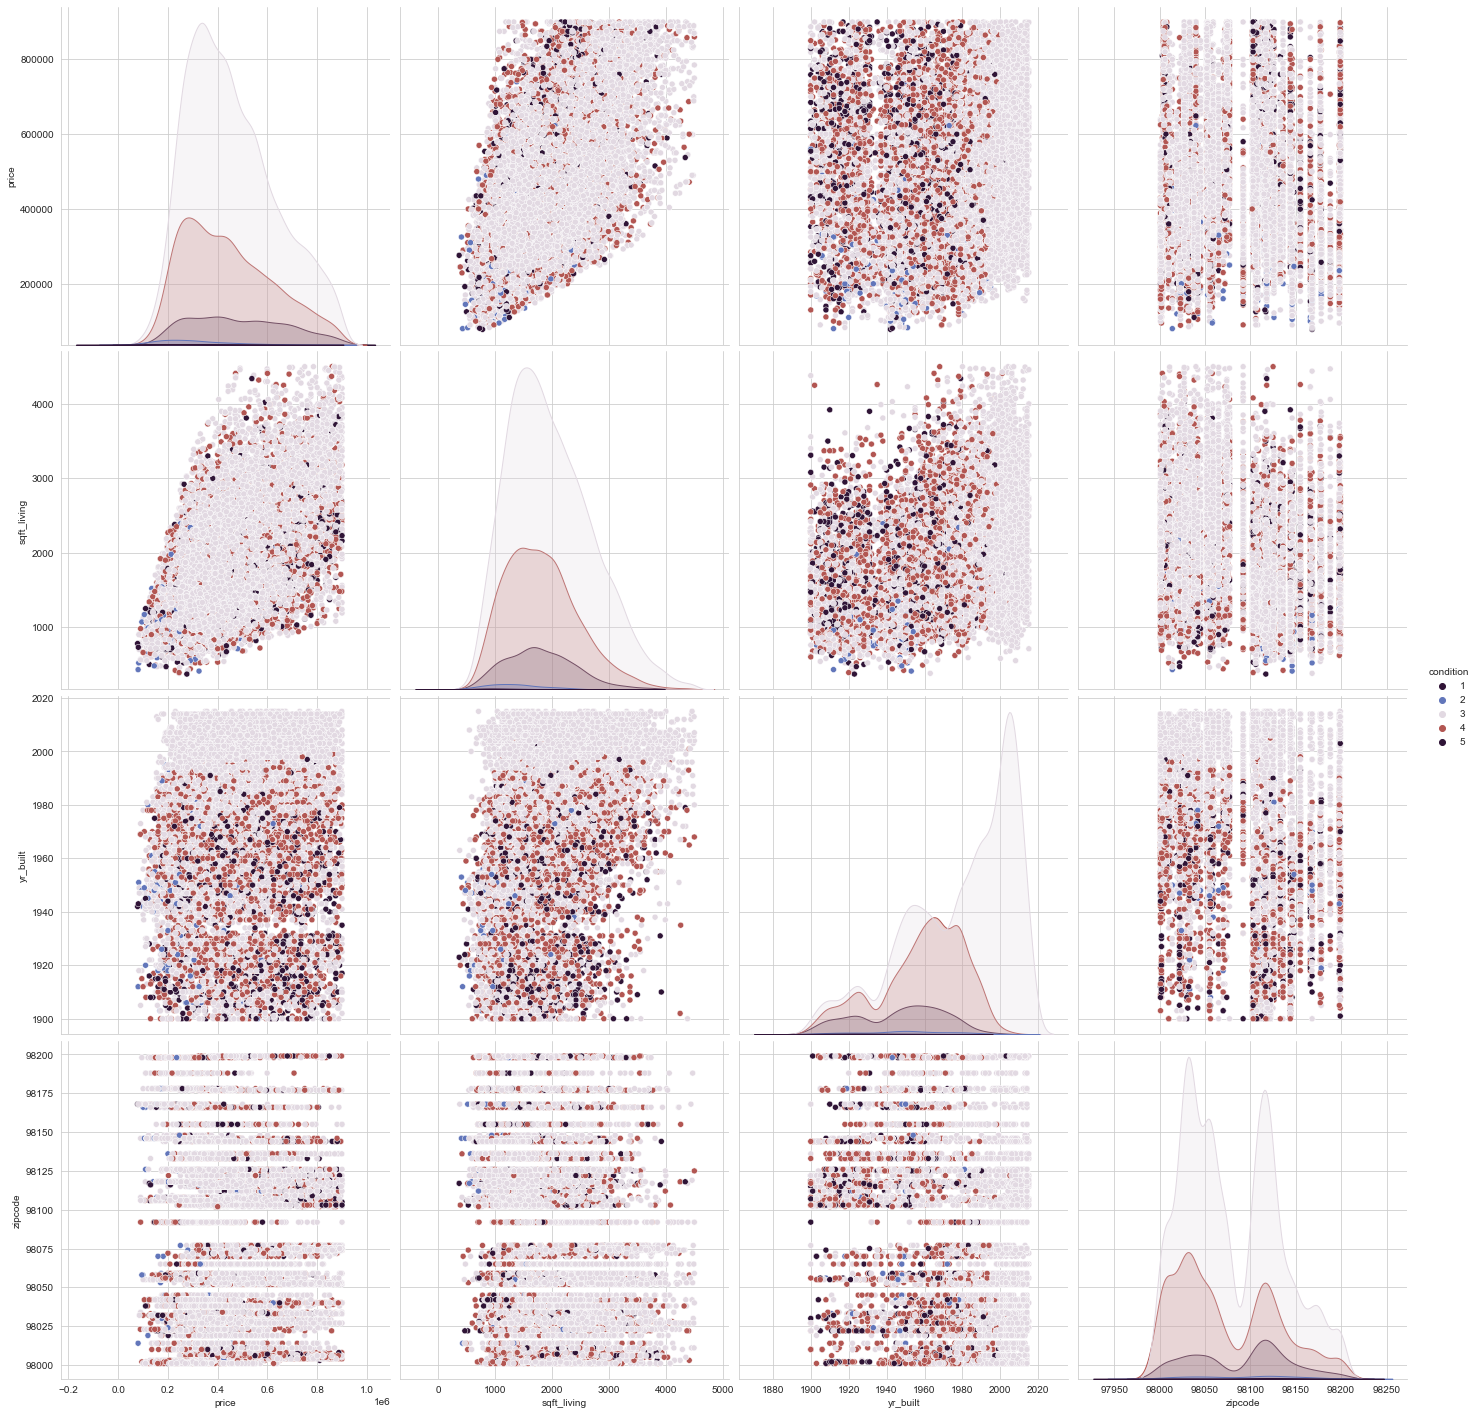

In [115]:
g = sns.pairplot(df_pairplot, hue= 'condition', palette= 'twilight_shifted', 
                 height= 5)

## Modeling and Prediction

### Feature Selection

Check correlation among features again. Making sure not to pick features with a strong correlation to each other to avoid multicollinearity.

In [116]:
# corr3 = df4.corr()

# plt.figure(figsize=(7,6))
# mask = np.triu(np.ones_like(corr3, dtype=bool))
# sns.heatmap(df4.corr(), cmap= 'nipy_spectral', mask= mask)
# plt.title("Correlation between features",weight='bold',fontsize=18)
# plt.show()

Let's see which features have the highest correlations.

In [117]:
# df_corr_stack = df4.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# df_corr_stack['pairs'] = list(zip(df_corr_stack.level_0, df_corr_stack.level_1))

# df_corr_stack.set_index(['pairs'], inplace= True)

# df_corr_stack.drop(columns= ['level_1', 'level_0'], inplace= True)
# df_corr_stack.columns = ['cc']

# df_corr_stack.drop_duplicates(inplace= True)

In [118]:
# df_corr_stack[(df_corr_stack.cc > .55) & (df_corr_stack.cc < 1)]

In [119]:
# def stepwise_selection(X, y, 
#                        initial_list=[], 
#                        threshold_in=0.01, 
#                        threshold_out = 0.05, 
#                        verbose=True):
#     """ Perform a forward-backward feature selection 
#     based on p-value from statsmodels.api.OLS
#     Arguments:
#         X - pandas.DataFrame with candidate features
#         y - list-like with the target
#         initial_list - list of features to start with (column names of X)
#         threshold_in - include a feature if its p-value < threshold_in
#         threshold_out - exclude a feature if its p-value > threshold_out
#         verbose - whether to print the sequence of inclusions and exclusions
#     Returns: list of selected features 
#     """
#     included = list(initial_list)
#     while True:
#         changed=False
#         # forward step
#         excluded = list(set(X.columns)-set(included))
#         new_pval = pd.Series(index=excluded)
#         for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.idxmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

#         # backward step
#         model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
#         # use all coefs except intercept
#         pvalues = model.pvalues.iloc[1:]
#         worst_pval = pvalues.max() # null if pvalues is empty
#         if worst_pval > threshold_out:
#             changed=True
#             worst_feature = pvalues.argmax()
#             included.remove(worst_feature)
#             if verbose:
#                 print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
#         if not changed:
#             break
#     return included

In [120]:
# y = df4['price']
# X = df4.drop('price', axis= 1)

# result = stepwise_selection(X, y)
# print ('resulting features:')
# print (result)

The stepwise selection function suggested the following features:

* grade__5_6                    
* grade__7_8 
* quad_SE                        
* sqft_living 
* quad_SW
* yr_built                       
* has_view              
* floors
* condition                     
* sqft_lot 
* waterfront                   
* year_sold 
* grade__9_11

In [121]:
# model1_df = df4[['price', 'sqft_living', 'yr_built', 'has_view']]

In [122]:
# g = sns.pairplot(model1_df, hue= 'has_view', palette= 'tab10', 
#                  height= 5)

In [123]:
# outcome = 'price'
# x_cols = df5.drop(columns= ['price'], axis= 1)

# predictors = '+'.join(x_cols)
# f = outcome + '~' + predictors
# model = ols(formula= f, data= df5).fit()

# model.summary()

### Log Transform

In [124]:
# log features
# log_names = [f'{column}_log' for column in ames_cont.columns]

# ames_log = np.log(ames_cont)
# ames_log.columns = log_names

# # normalize (subract mean and divide by std)

# def normalize(feature):
#     return (feature - feature.mean()) / feature.std()
# ames_log_norm = ames_log.apply(normalize)

### Train test split

In [125]:
# y = df4['price']
# X = df4.drop('price', axis= 1)

In [126]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

### Improving baseline model

In [127]:
# get rid of columns you won't use
# https://www.youtube.com/watch?v=8_Le51miL-8
# https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/

In [128]:
# log transform

In [129]:
# qq plot
# sm.graphics.qqplot(model.resid, dist= stats.norm, line= '45', fit= True)


In [130]:
# df2 = df1[['price', 'waterfront', 'yr_built', 'sqft_living15', 'zipcode']]

In [131]:
# pd.plotting.scatter_matrix(df2, figsize= [11,11]);

In [132]:
# df['zipcode'].hist()
# plt.show()

In [133]:
# df.groupby('lat')['sqft_living'].mean().nlargest(5)
# df.groupby('lat')['sqft_living'].mean().min()
# df.groupby('long')['sqft_living'].mean().max()
# df.loc[(df['sqft_living'] <= 1200) & (df['sqft_living15'] > 2000)]
# df.loc[(df['sqft_living'] >= 3000)]
# df.groupby('long')['sqft_living'].mean().nlargest(5)

# for reference - delete when finished
# df_id_dups.groupby('date')['id'].count()
# df_id_dups= df_id_dups.groupby(['id']).unique().count()

In [134]:
# create boxplot with all columns
# sns.boxplot(data=df, orient= 'h')

# # drop price, sqft_lot, zipcode, and sqft_lot15 to see rest of columns better
# boxplot_df.drop(['price', 'sqft_lot', 'sqft_lot15', 'zipcode'], axis= 1, inplace= True)

# # plot only one column in boxplot
# print (df['price'].nlargest(5))
# sns.boxplot(x= df['price'])

In [135]:
# z test, z score
# How to remove everything after 2 standard deviations - can also use lambda
# df = df[(np.abs(stats.zscore(df)) < 2).all(axis=1)]
# df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 1).all(axis=1)]

#can filter by column too - here "B" is name of column
# df[((df.B - df.B.mean()) / df.B.std()).abs() < 2]

In [136]:
# First, let's look at houses that were built from 1900 - 1940 that
# had renovations since the year 2000
# reno_1940 = len(df.loc[(df['yr_built'] <= 1940) & (df['yr_renovated'] >= 2000)])
# print('# of houses built before 1940 that had renovation within 15 years:', 
#       reno_1940)
# print('% of houses that had recent reno and built before 1940: ',
#      reno_1940 / len(df['yr_built']))